In [ ]:
!pip install chart_studio

     |████████████████████████████████| 71kB 4.4MB/s 


In [2]:
import plotly.graph_objects as go
import plotly.offline as offline_py
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import numpy as np

%matplotlib inline

In [3]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/DSEI21000-S21/project-product-price-prediction/main/data/random_samples/stratified_sampling_data_by_price_whigh_sz50000_1619218354.csv")

# size of dataset
print('The size of the dataset is: {} \n'.format(df.shape))

# different data types in the dataset
print('The types of the dataset: {}'.format(df.dtypes))

df.head()

The size of the dataset is: (50000, 11) 

The types of the dataset: train_id               int64
name                  object
item_condition_id      int64
brand_name            object
price                float64
shipping               int64
item_description      object
c1                    object
c2                    object
c3                    object
price_bin             object
dtype: object


,train_id,name,item_condition_id,brand_name,price,shipping,item_description,c1,c2,c3,price_bin
0,694996,Lululemon Wunder Under w/ stirrup- BLACK,2,Lululemon,84.0,0,All black. Size 4,women,athletic apparel,"pants, tights, leggings","(80, 90]"
1,1005043,iPhone 7 Plus - 128 GB - Silver/Unlocked,1,Apple,739.0,0,"Brand new Apple iPhone 7 Plus , 128 GB, in the...",electronics,cell phones & accessories,cell phones & smartphones,"(500, 2500]"
2,1379656,4moms rockaroo,3,mamaRoo,75.0,0,4moms swing rockaroo Used for babies from birt...,kids,gear,"swings, jumpers & bouncers","(70, 80]"
3,674670,Nivea Lip Balm,1,Nivea,16.0,1,(10) Nivea Lip As pictured New Price is for al...,other,daily & travel items,personal care,"(15, 20]"
4,1439218,Louis Vuitton neverfull MM,2,Louis Vuitton,704.0,0,Size:MM,women,women's handbags,shoulder bag,"(500, 2500]"


In [ ]:
df.price.describe()

count    50000.000000
mean       108.125030
std        196.842159
min          3.000000
25%         20.000000
50%         50.000000
75%         90.000000
max       2009.000000
Name: price, dtype: float64

In [ ]:
# most popular categories -- Women, electronics and men
x = df['c1'].value_counts().index.values.astype('str')[:15]
y = df['c1'].value_counts().values[:15]
pct = [("%.2f"%(v*100))+"%" for v in (y/len(df))] [:15]

In [ ]:
trace1 = go.Bar(x=x, y=y, text=pct)
layout = dict(title= 'Number of Items by Main Category',
              yaxis = dict(title='Count'),
              xaxis = dict(title='Brand'))
fig=dict(data=[trace1], layout=layout)
offline_py.iplot(fig)

In [ ]:
x = df['brand_name'].value_counts().index.values.astype('str')[:15]
y = df['brand_name'].value_counts().values[:15]
pct = [("%.2f"%(v*100))+"%" for v in (y/len(df))] [:15]

In [ ]:
colorscale = [[0, '#FAEE1C'], [0.33, '#F3558E'], [0.66, '#9C1DE7'], [1, '#581B98']]

In [ ]:
# most popular brands -- Nike & PINK
trace1 = go.Bar(x=x, y=y, text=pct, marker=dict(color = y, colorscale=colorscale, showscale=True))
layout = dict(title= 'Number of Items by brand name',
              yaxis = dict(title='Count'),
              xaxis = dict(title='Brand'))
fig=dict(data=[trace1], layout=layout)
offline_py.iplot(fig)

In [ ]:
dataframe = df[df.brand_name == 'Nike'][:100]
datawomen = dataframe.loc[:, ['price', 'shipping']]
datawomen["index"] = np.arange(1,len(datawomen)+1)

fig = ff.create_scatterplotmatrix(datawomen, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',
                                  height=700, width=700)
offline_py.iplot(fig)

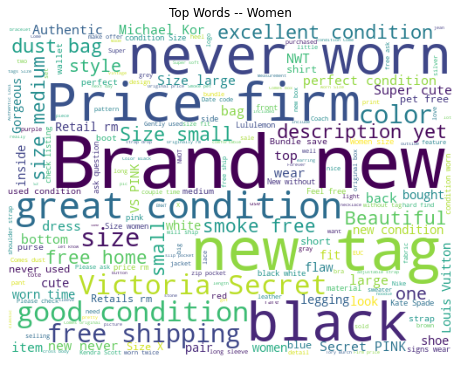

In [ ]:
# visualize which words has the highest frequencies within the top1 category
description = df.item_description[df.c1 == 'women']

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(' '.join(description))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.title('Top Words -- Women')
plt.show()

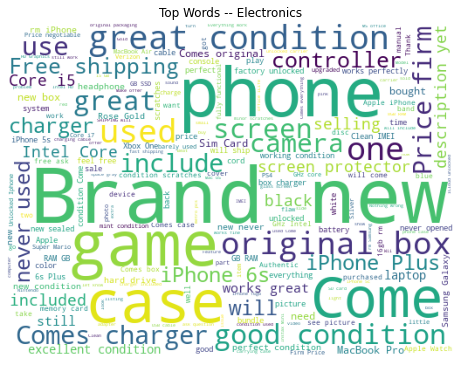

In [5]:
description = df.item_description[df.c1 == 'electronics']

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(' '.join(description))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.title('Top Words -- Electronics')
plt.show()

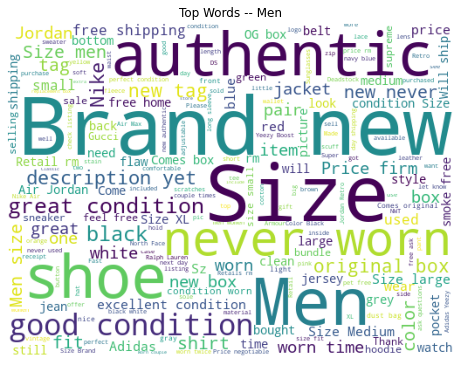

In [6]:
description = df.item_description[df.c1 == 'men']

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(' '.join(description))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.title('Top Words -- Men')
plt.show()